In [2]:
!pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8488 sha256=484643bdee326595210244f57ca75a8937b5ea4c626acfc2eec0b07b708077c3
  Stored in directory: /Users/f.gregori/Library/Caches/pip/wheels/21/c9/66/b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking


In [1]:
import yfinance as yf
from py2neo import Graph
from py2neo.data import Node, Relationship

### Reading gamestop stock quotes

In [2]:
#define the ticker symbol
tickerSymbol = 'GME'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1h', interval='1h', start='2021-01-01', end='2021-03-01')

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-01-04 09:30:00-05:00,19.055000,19.058800,17.150000,17.899900,3104360,0,0
2021-01-04 10:30:00-05:00,17.874701,18.110001,17.260000,17.520000,2386728,0,0
2021-01-04 11:30:00-05:00,17.530001,17.820000,17.440001,17.760000,960711,0,0
2021-01-04 12:30:00-05:00,17.750000,17.820000,17.508101,17.590000,526246,0,0
2021-01-04 13:30:00-05:00,17.600000,17.639999,17.469999,17.530001,705828,0,0
...,...,...,...,...,...,...,...
2021-02-26 11:30:00-05:00,113.970001,116.989998,92.000000,93.070000,12935280,0,0
2021-02-26 12:30:00-05:00,93.553200,105.989998,86.000000,99.431198,15000360,0,0
2021-02-26 13:30:00-05:00,99.639198,103.900002,97.000000,101.709900,7424071,0,0
2021-02-26 14:30:00-05:00,101.790001,125.000000,100.300003,109.330002,17175356,0,0


In [3]:
tickerDf.index

DatetimeIndex(['2021-01-04 09:30:00-05:00', '2021-01-04 10:30:00-05:00',
               '2021-01-04 11:30:00-05:00', '2021-01-04 12:30:00-05:00',
               '2021-01-04 13:30:00-05:00', '2021-01-04 14:30:00-05:00',
               '2021-01-04 15:30:00-05:00', '2021-01-05 09:30:00-05:00',
               '2021-01-05 10:30:00-05:00', '2021-01-05 11:30:00-05:00',
               ...
               '2021-02-25 13:30:00-05:00', '2021-02-25 14:30:00-05:00',
               '2021-02-25 15:30:00-05:00', '2021-02-26 09:30:00-05:00',
               '2021-02-26 10:30:00-05:00', '2021-02-26 11:30:00-05:00',
               '2021-02-26 12:30:00-05:00', '2021-02-26 13:30:00-05:00',
               '2021-02-26 14:30:00-05:00', '2021-02-26 15:30:00-05:00'],
              dtype='datetime64[ns, America/New_York]', length=266, freq=None)

In [4]:
tickerDf['timestamp_utc'] = tickerDf.index.tz_convert('UTC')

In [5]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,timestamp_utc
2021-01-04 09:30:00-05:00,19.055000,19.058800,17.150000,17.899900,3104360,0,0,2021-01-04 14:30:00+00:00
2021-01-04 10:30:00-05:00,17.874701,18.110001,17.260000,17.520000,2386728,0,0,2021-01-04 15:30:00+00:00
2021-01-04 11:30:00-05:00,17.530001,17.820000,17.440001,17.760000,960711,0,0,2021-01-04 16:30:00+00:00
2021-01-04 12:30:00-05:00,17.750000,17.820000,17.508101,17.590000,526246,0,0,2021-01-04 17:30:00+00:00
2021-01-04 13:30:00-05:00,17.600000,17.639999,17.469999,17.530001,705828,0,0,2021-01-04 18:30:00+00:00
...,...,...,...,...,...,...,...,...
2021-02-26 11:30:00-05:00,113.970001,116.989998,92.000000,93.070000,12935280,0,0,2021-02-26 16:30:00+00:00
2021-02-26 12:30:00-05:00,93.553200,105.989998,86.000000,99.431198,15000360,0,0,2021-02-26 17:30:00+00:00
2021-02-26 13:30:00-05:00,99.639198,103.900002,97.000000,101.709900,7424071,0,0,2021-02-26 18:30:00+00:00
2021-02-26 14:30:00-05:00,101.790001,125.000000,100.300003,109.330002,17175356,0,0,2021-02-26 19:30:00+00:00


<AxesSubplot:title={'center':"GME's stock price"}>

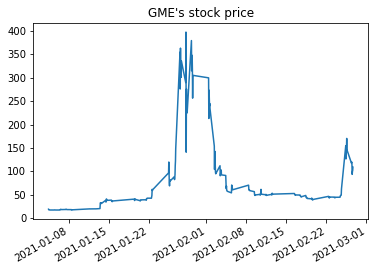

In [6]:
tickerDf['Open'].plot(title="GME's stock price")

Localhost

In [13]:
#graph = Graph(scheme="bolt", host="localhost", port="7787", user="neo4j", password="neo4j1")

Sandbox

In [7]:
graph = Graph(scheme="bolt", host="54.90.165.10", port="7687", user="neo4j", password="clicks-haul-qualifier")

In [8]:
query = """
CREATE (a:Stock{name: $name})
"""
graph.run(query, parameters = {'name': 'GME'})

(No data)

In [9]:
#tx = graph.begin()
for index, row in tickerDf.iterrows():
    graph.run('''
      CREATE (n:StockQuote { 
        timestamp_utc: $timestamp,
        open: $open,
        high: $high,
        low: $low,
        close: $close,
        volume: $volume})
    ''', parameters = {'timestamp': row['timestamp_utc'], 
                       'open': row['Open'],
                      'high': row['High'],
                      'low': row['Low'],
                      'close': row['Close'],
                      'volume': row['Volume']})
#graph.commit(tx)

In [10]:
query = """
MATCH (a:Stock),(c:StockQuote)
WHERE a.name = 'GME'
CREATE (a)-[:TRADING_HOUR]->(c)
"""
graph.run(query)

(No data)

In [11]:
query = """
MATCH (s:Stock)-[:TRADING_HOUR]->(hour)
WITH s, hour
ORDER BY hour.timestamp_utc ASC
WITH s, collect(hour) as nodes, collect(hour.close) as closes
SET s.close_array = closes
WITH nodes
CALL apoc.nodes.link(nodes, 'NEXT_DATE')
RETURN distinct 'done' AS result
"""
graph.run(query)

result
done


In [7]:
#get the historical prices for this ticker
tickerDfDay = tickerData.history(period='1d', interval='1d', start='2021-01-17', end='2021-01-31')

In [8]:
tickerDfDay

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-19,41.549999,45.520000,36.639999,39.360001,74721900,0,0
2021-01-20,37.369999,41.189999,36.060001,39.119999,33471800,0,0
2021-01-21,39.230000,44.750000,37.000000,43.029999,56216900,0,0
2021-01-22,42.590000,76.760002,42.320000,65.010002,197157900,0,0
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000,0,0
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000,0,0
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700,0,0
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800,0,0
2021-01-29,379.709991,413.980011,250.000000,325.000000,50566100,0,0


In [9]:
tickerDfDay.to_csv('../data/from_db/daily_quotes.csv')